<a href="https://colab.research.google.com/github/DarshanPatel0919/Computational-Numerical-Methods/blob/main/Set_9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set 9
# Q1


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


def solve_matrix(A, b):
  A1 = np.linalg.inv(A)
  X = np.matmul(A1,b)
  return X


if __name__ == '__main__':
  A = [[1,2,1], [2,2,3], [-1,-3,0]]
  b = [0,3,2]
  print(solve_matrix(A, b))

[ 1. -1.  1.]


In [ ]:
#Set 9
# Q2


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


def solve_matrix(A, b):
  A1 = np.linalg.inv(A)
  X = np.matmul(A1,b)
  return X


if __name__ == '__main__':
  
  A = [
    [4,3,2,1],
    [3,4,3,2],
    [2,3,4,3],
    [1,2,3,4]
  ]
  
  b = [1,1,-1,-1]
  print(solve_matrix(A, b))

[-1.11022302e-16  1.00000000e+00 -1.00000000e+00  1.11022302e-16]


In [ ]:
#Set 9
# Q3


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


if __name__ == '__main__':
  A = [
    [1,1,-1],
    [1,2,-2],
    [-2,1,1]
  ]
  
  A1 = np.linalg.inv(A)
  print(A1)

[[ 2.00000000e+00 -1.00000000e+00 -1.94289029e-16]
 [ 1.50000000e+00 -5.00000000e-01  5.00000000e-01]
 [ 2.50000000e+00 -1.50000000e+00  5.00000000e-01]]
[[ 1.00000000e+00  2.22044605e-16 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


[ 1.  2. -1.]


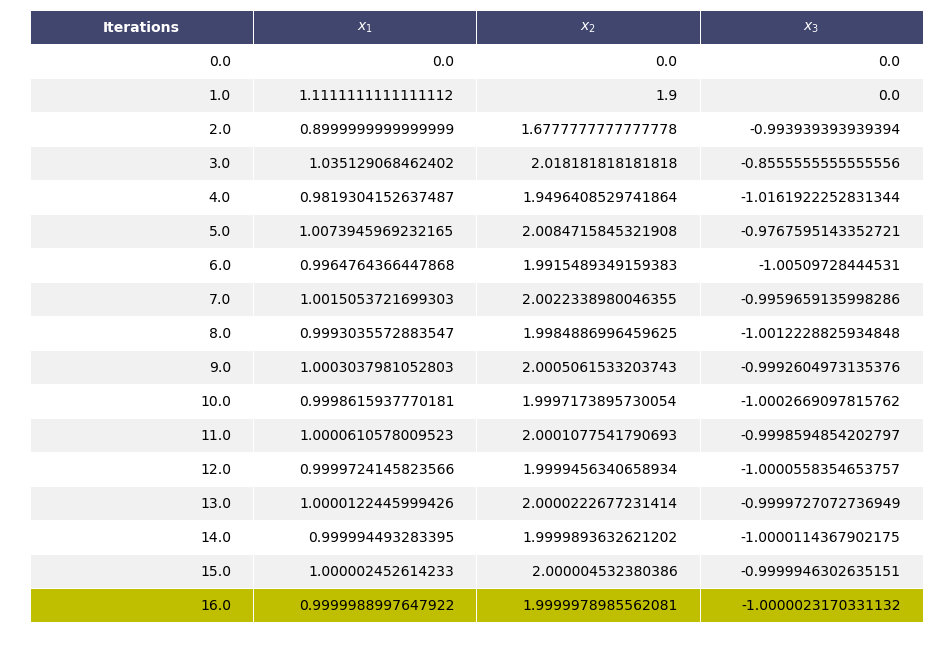

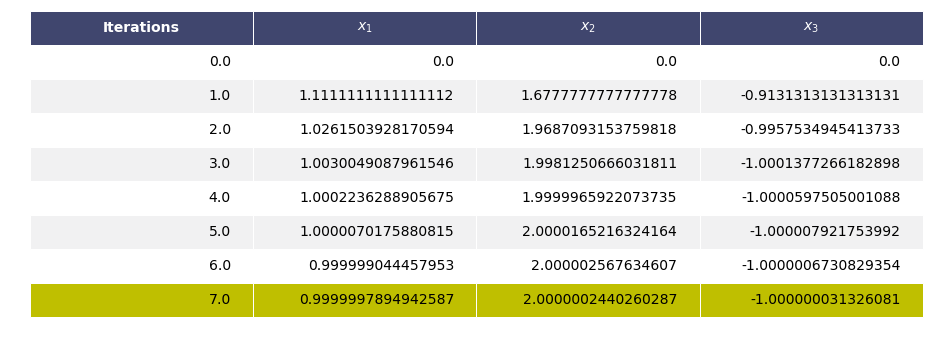

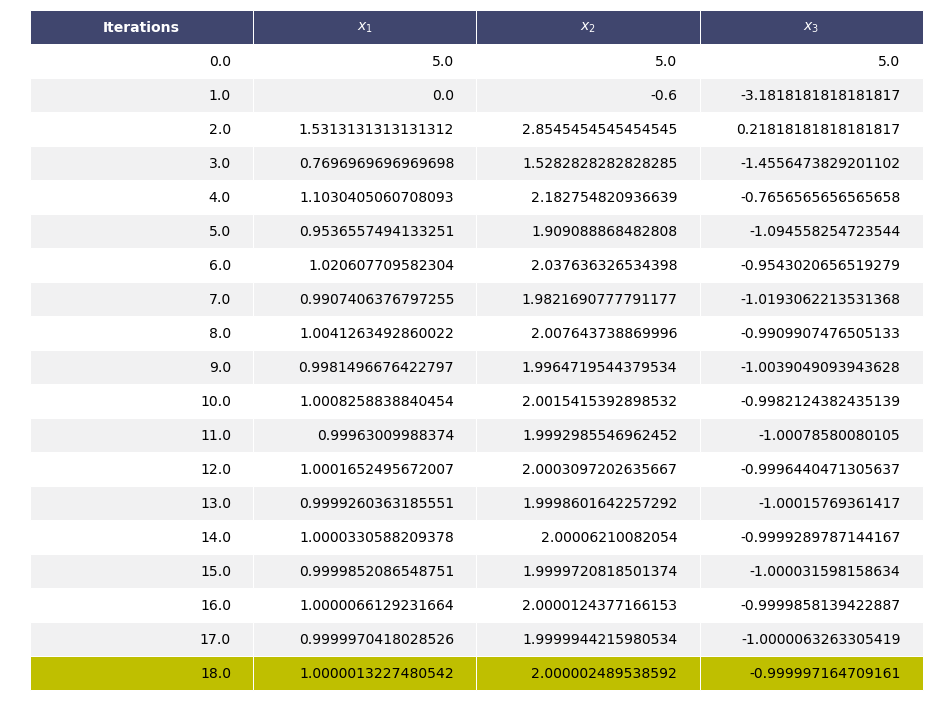

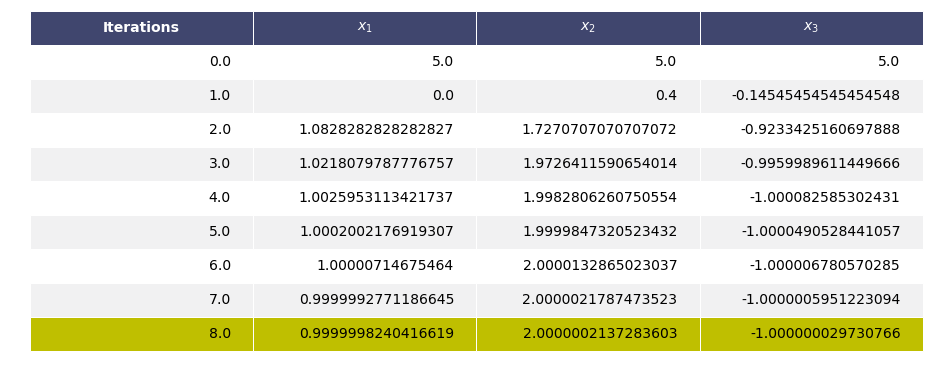

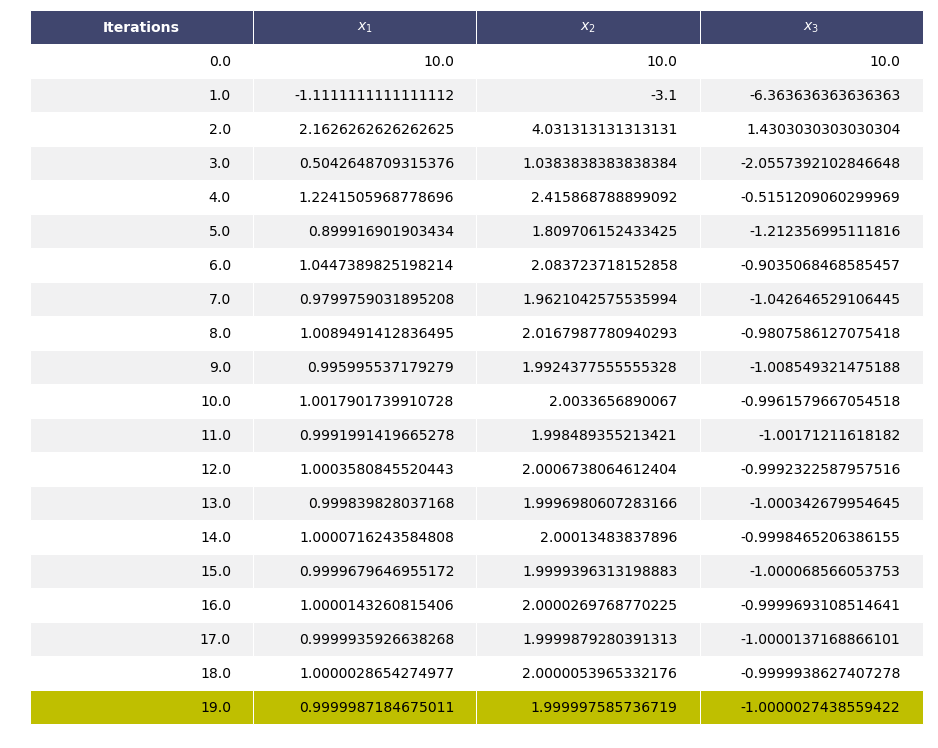

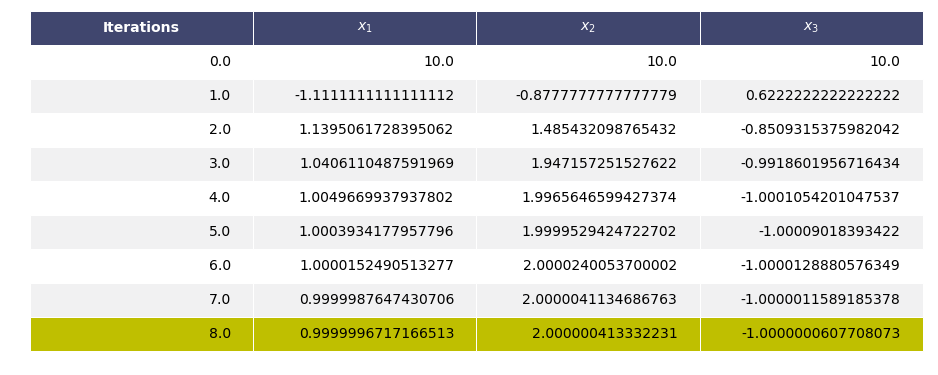

In [ ]:
#Set 10
# Q1


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import derivative as drv
import six
import math




def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
            
        if k[0] == len(data):
            cell.set_facecolor('y')
    
    return ax





def solve_matrix(A, b):
    A1 = np.linalg.inv(A)
    X = np.matmul(A1,b)
    return X




error = 1e-5
def jacobi(A, b, X_prev, id):
    n = len(A)
    cnt = 0
    X_curr = [0 for i in range(n)]
    matrix = [[0] + X_prev]
    while True:
        cnt += 1
        poss = 1
        for i in range(n):
            X_curr[i] = b[i]
            for j in range(n):
                if i!=j:
                    X_curr[i] -= A[i][j]*X_prev[j]
            X_curr[i] /= A[i][i]
        x_new = [cnt] + X_curr
        matrix.append(x_new)
        for i in range(n):
            if abs(X_prev[i] - X_curr[i]) > error:
                poss = 0
                break
        X_prev = np.copy(X_curr)
        if poss == 1:
            break
    names = ['Iterations'] + ["$x_{}$".format(i+1) for i in range(n)]
    df = pd.DataFrame(np.asarray(matrix),columns=names)
    render_mpl_table(df, header_columns=0, col_width=4.0) 
    plt.savefig(str(id+1)+'_a.png')
    
    
def gauss_seidel(A, b, X_curr, id):
    n = len(A)
    cnt = 0
    X_prev = np.copy(X_curr)
    matrix = [[0] + X_curr]
    while True:
        cnt += 1
        poss = 1
        for i in range(n):
            X_curr[i] = b[i]
            for j in range(n):
                if i!=j:
                    X_curr[i] -= A[i][j]*X_curr[j]
            X_curr[i] /= A[i][i]
        x_new = [cnt] + X_curr
        matrix.append(x_new)
        for i in range(n):
            if abs(X_prev[i] - X_curr[i]) > error:
                poss = 0
                break
        X_prev = np.copy(X_curr)
        if poss == 1:
            break
    names = ['Iterations'] + ["$x_{}$".format(i+1) for i in range(n)]
    df = pd.DataFrame(np.asarray(matrix),columns=names)
    render_mpl_table(df, header_columns=0, col_width=4.0)  
    plt.savefig(str(id+1)+'_b.png')
    
    
    
    

if __name__ == '__main__':
  
    A = [
    [9,1,1],
    [2,10,3],
    [3,4,11]
    ]
  
    b = [10,19,0]
    X_ini = [
        [0,0,0],
        [5,5,5],
        [10,10,10]
    ]

    print(solve_matrix(A, b))
    for i in range(len(X_ini)):
        jacobi(A, b, X_ini[i], i)
        gauss_seidel(A, b, X_ini[i], i)
  